<a href="https://colab.research.google.com/github/abhilashs1/Bike_Sharing_Demand/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [10]:
#IMPORTING LIBRARIES

import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

from datetime import datetime     #importing for date time application
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss
warnings.filterwarnings('ignore')


# MOUNT THE DRIVE AND IMPORT THE Dataset 

In [11]:
#MOUNTING DRIVE

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# LOAD SEOLBIKE DATA SET FROM DRIVE

bike_df = pd.read_csv('/content/drive/MyDrive/Bike Sharing Demand/SeoulBikeData.csv',encoding ='latin')



---



# **EXPLORATORY DATA ANALYSIS**

EDA is unavoidable and one of the major step to fine-tune the given data set in different form of analysis to understand the insights .it is an approach to analyzing datasets to summerize their main characteristics , often with visual methods. 

**UNDERSTANDING MORE ABOUT THE DATA**





In [13]:
#head of the data 

bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [14]:
#tail of the data

bike_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [15]:
#shape of the dataset with rows and columns
bike_df.shape

(8760, 14)

In [16]:
#description of data

bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [17]:
#columns name of the dataset
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [18]:
print(bike_df['Seasons'].unique())
print(bike_df['Holiday'].unique())
print(bike_df['Functioning Day'].unique())
print(bike_df['Date'].unique())

['Winter' 'Spring' 'Summer' 'Autumn']
['No Holiday' 'Holiday']
['Yes' 'No']
['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/01/2018' '29/01/2018'
 '30/01/2018' '31/01/2018' '01/02/2018' '02/02/2018' '03/02/2018'
 '04/02/2018' '05/02/2018' '06/02/2018' '07/02/2018' '08/02/2018'


In [19]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [20]:
#unique values

bike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [21]:
#checking the no null values
bike_df.isna().sum()
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Above result says that there are no null values in the data



In [22]:
bike_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8755    False
8756    False
8757    False
8758    False
8759    False
Length: 8760, dtype: bool


The Dataset Has No Missing Or Duplicate Or Null Vallues ☺️🙏




---



This Data Contains 8760 Rows And 14 Columns . That
Means In A Day We Have 24 Hours And 365 Days In A Year So While Multiplieing 365 *24 = 8760 So The Given Dataset Is The Data Of A Whole Year .Which Represents The Nymber Of Lines In The Dataset 




---



**Date** : The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str, we need to convert into datetime format.

**Rented Bike Count** : Number of rented bikes per hour which our dependent variable and we need to predict that, type : int

**Hour:** The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.

**Temperature(°C)**: Temperature in Celsius, type : Float

**Humidity(%)**: Humidity in the air in %, type : int

**Wind speed (m/s) :** Speed of the wind in m/s, type : Float

**Visibility (10m):** Visibility in m, type : int

**Dew point temperature(°C)**: Temperature at the beggining of the day, type : Float

**Solar Radiation (MJ/m2)**: Sun contribution, type : Float

**Rainfall(mm)**: Amount of raining in mm, type : Float

**Snowfall (cm)**: Amount of snowing in cm, type : Float

**Seasons**: Season of the year, type : str, there are only 4 season's in data .

**Holiday:** If the day is holiday period or not, type: str

**Functioning Day:** If the day is a Functioning Day or not, type : str



---



# changing column names 

**some of the columns name in the dataset are too large and clumsy so we change that into some simple names**


---



In [23]:
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [24]:
bike_df=bike_df.rename(columns= { 'Rented Bike Count':'Rented_Bike_Count',
                    'Temperature(°C)':'Temperature',
                    'Humidity(%)':'Humidity',
                    'Wind speed (m/s)': 'Wind_speed',
                    'Visibility (10m)':'Visibility',
                    'Dew point temperature(°C)': 'Dew_point_temperature',
                    'Solar Radiation (MJ/m2)':'Solar_Radiation',
                    'Rainfall(mm)':'Rainfall',
                    'Snowfall (cm)':'Snowfall',
                    'Functioning Day':'Functioning_day'})

In [25]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented_Bike_Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind_speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew_point_temperature  8760 non-null   float64
 8   Solar_Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning_day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

changing the date column into day, month ,year

In [26]:
bike_df['Date'] =bike_df['Date'].apply(lambda x:
                              dt.datetime.strptime(x,'%d/%m/%Y'))

In [27]:
# extracting the year and month from the date feature
bike_df['year'] = bike_df['Date'].dt.year
bike_df['month'] = bike_df['Date'].dt.month
bike_df['day'] = bike_df['Date'].dt.day_name()

In [28]:
# creating a new column of'weekdays_weekend' 
bike_df['weekdays_weekend']=bike_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
bike_df=bike_df.drop(columns=['Date','day','year'],axis=1)

In [29]:
bike_df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0




*  here the date column is changed to year month and day 

*   the dataset contains datas of 2017 december to 2018 novmber , so consider this is a one year , so just drop year column because 


*   also remove another column day ,because we dont need each day of every month ,we need data about weekday and weekend so we convert it into this foemat and drop day column











In [30]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_day        8760 non-null   object 
 13  month                  8760 non-null   int64  
 14  weekdays_weekend       8760 non-null   int64  
dtypes: f

In [31]:
bike_df['weekdays_weekend'].value_counts()

0    6264
1    2496
Name: weekdays_weekend, dtype: int64

In [32]:
#converting 'hour','month''weekdays_weekend' columns into categorical data .

cols=['Hour','month','weekdays_weekend']
for col in cols:
  bike_df[col]=bike_df[col].astype('category')

In [33]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekdays_weekend       8760 non-null   c

# Checkingdistribution over dependent variable



Here we analyse our dependent variable ,A dependent variable is a variable whose value will change depending on the value of another variable.

our dependent variable is **Rented bike count**




**Now we analyse dependent variable with other columns by using some visualisation plots.**

**here we have categorical and numerical datas **


**so we have to analyse both datas with dependent variable** 



# **Exploring Categorical variables**

# SEASONS

In [34]:
bike_df.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_day', 'month',
       'weekdays_weekend'],
      dtype='object')

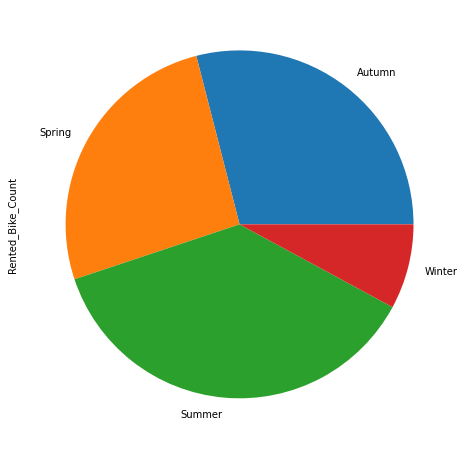

In [35]:
bike_df.groupby('Seasons')['Rented_Bike_Count'].sum().plot.pie(figsize=(15,8))

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

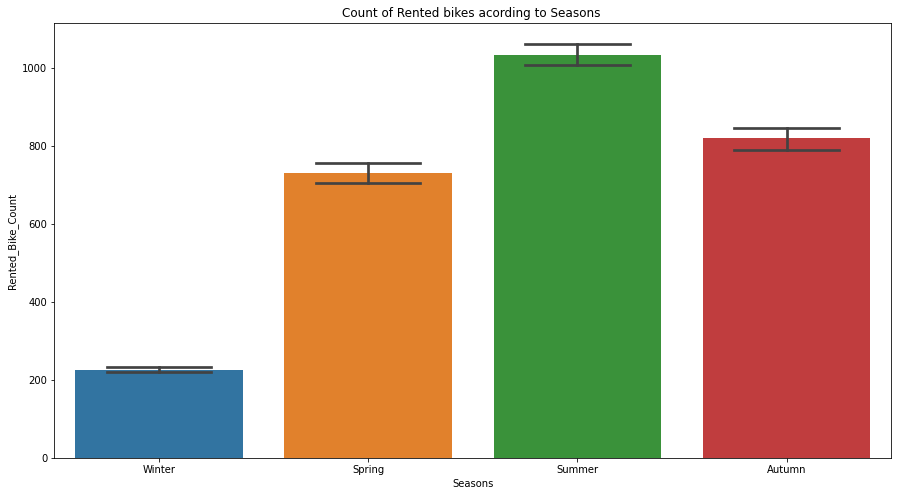

In [36]:
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=bike_df,x='Seasons',y='Rented_Bike_Count',ax=ax,capsize= .5)
ax.set(title='Count of Rented bikes acording to Seasons ')

From the  above barplot we can understand that usage of rented bike in those 4 seasons 


*   In summer season use of rented bike is very high 
*   In winter season the use of rented bike is very low  



# Month

[Text(0.5, 1.0, 'Count of Rented bikes acording to month ')]

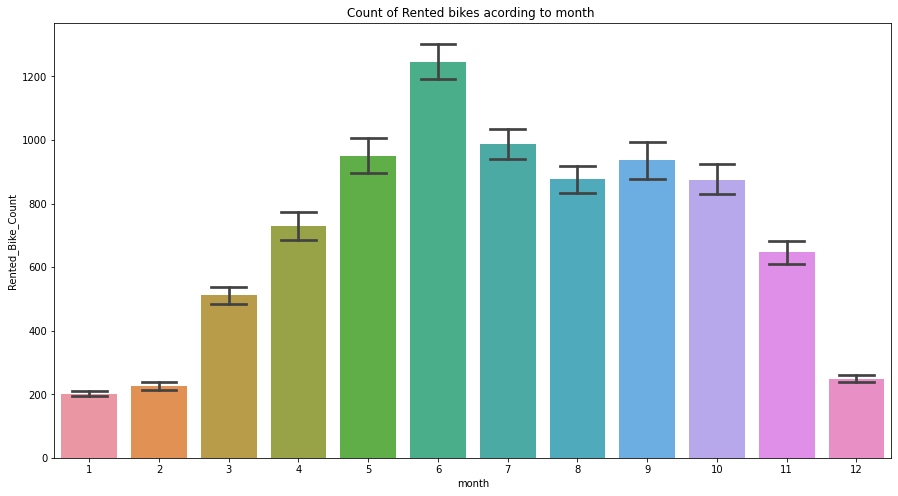

In [37]:
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=bike_df,x='month',y='Rented_Bike_Count',ax=ax,capsize= .5)
ax.set(title='Count of Rented bikes acording to month ')

**From this month and bike count bar plot we can say that on june ,julu , auguest ,september , october , the use of rented bike is high as compared to other month** 

# Weekdays and weekend

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend ')]

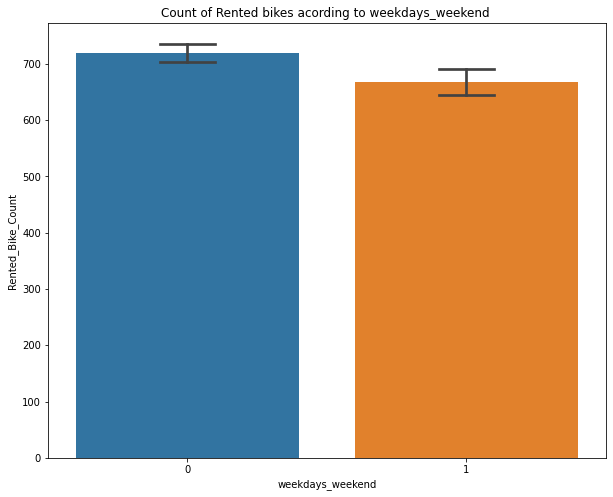

In [38]:
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=bike_df,x='weekdays_weekend',y='Rented_Bike_Count',ax=ax,capsize= .2)
ax.set(title='Count of Rented bikes acording to weekdays_weekend ')

**From the above graph we observe that demand of bike is high in weekdays as compaired to weekend . it may because of the office . peoples using rented bike for reaching their office** .

# Hour

[Text(0.5, 1.0, 'Count of Rented bikes acording to hour ')]

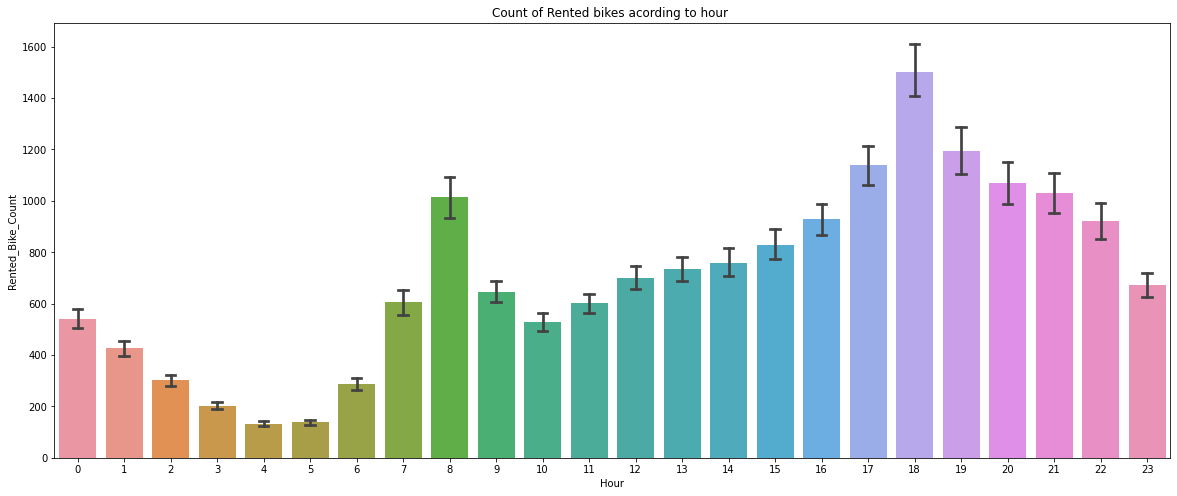

In [39]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=bike_df,x='Hour',y='Rented_Bike_Count',ax=ax,capsize= .2)
ax.set(title='Count of Rented bikes acording to hour ')

### **In the above plot shows that the use of rented bike according to hours .**


**From this graph we observe thatpeople are using rented bike **between 6AM to 9AM  AND 5pm to 7PM ,that means they use bikes for reaching their office**

# Functioning day

[Text(0.5, 1.0, 'Count of Rented bikes acording to  Functioning Day')]

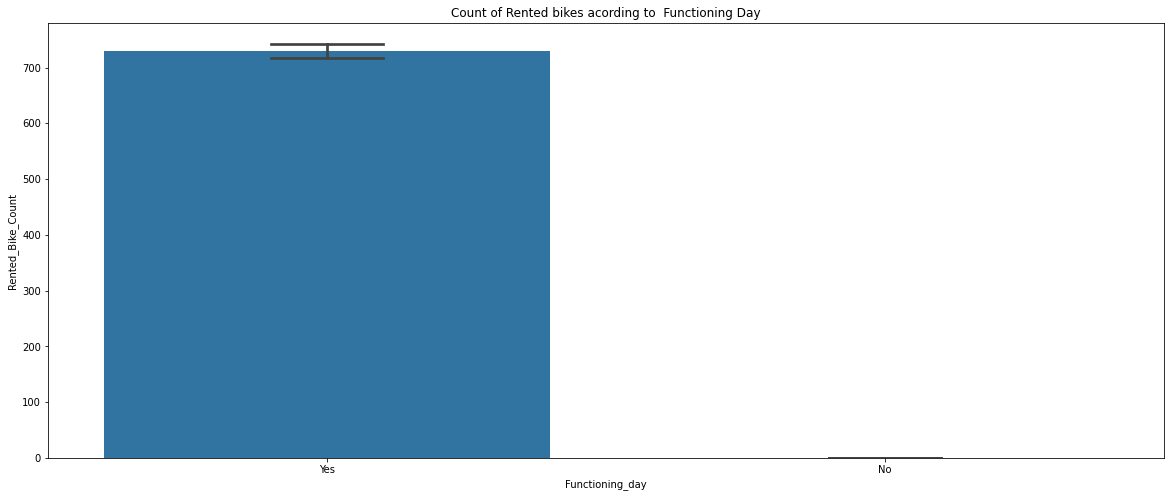

In [40]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=bike_df,x= 'Functioning_day',y='Rented_Bike_Count',ax=ax,capsize= .2)
ax.set(title='Count of Rented bikes acording to  Functioning Day')

**The above graph represent if the rented bike is using in  functiong day or not **
**Here we understand that people doesnot use bike in non functioning day**

# Holiday

[Text(0.5, 1.0, 'Count of Rented bikes acording to  holiday')]

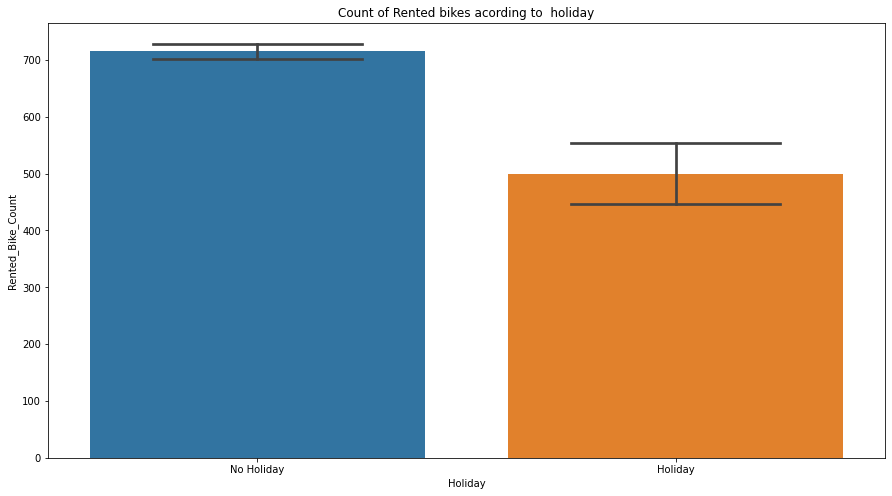

In [41]:
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=bike_df,x= 'Holiday',y='Rented_Bike_Count',ax=ax,capsize= .5)
ax.set(title='Count of Rented bikes acording to  holiday')

**This graph shows the use ofrented bike in holiday**

**We can undestand from the graph that in nonholidays people use rented bikemore ascompared to holidays**

# **Exploring Numerical Variables**

**Numerical data is a data type expressed in numbers, rather than natural language description. Sometimes called quantitative data, numerical data is always collected in number form. Numerical data differentiates itself from other number form data types with its ability to carry out arithmetic operations with these numbers.**

printing displots to analyze the distribution of all numerical features

In [42]:
numerical_columns = list(bike_df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

<Figure size 720x432 with 0 Axes>

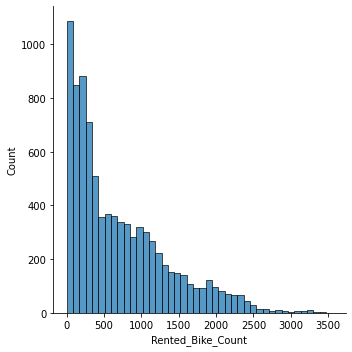

<Figure size 720x432 with 0 Axes>

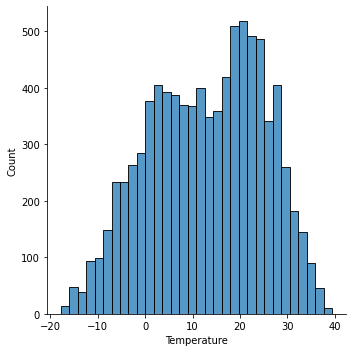

<Figure size 720x432 with 0 Axes>

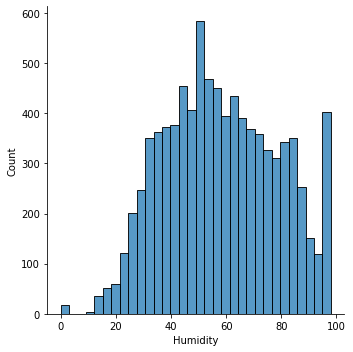

<Figure size 720x432 with 0 Axes>

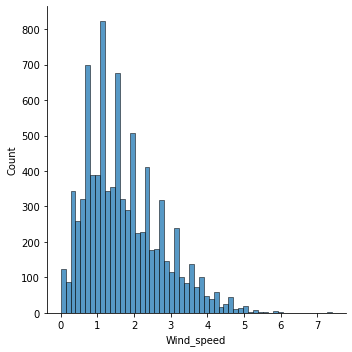

<Figure size 720x432 with 0 Axes>

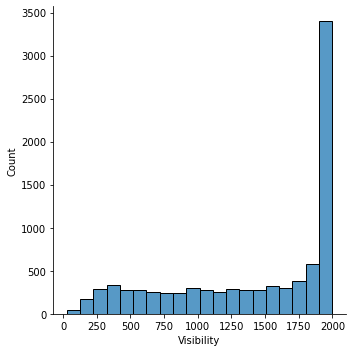

<Figure size 720x432 with 0 Axes>

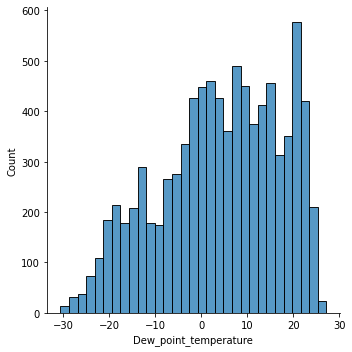

<Figure size 720x432 with 0 Axes>

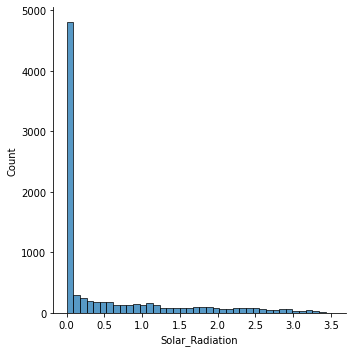

<Figure size 720x432 with 0 Axes>

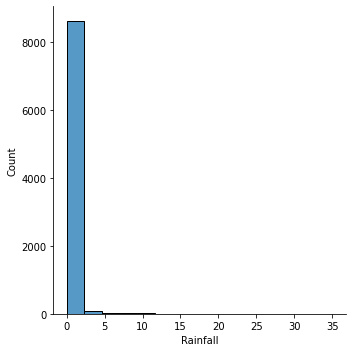

<Figure size 720x432 with 0 Axes>

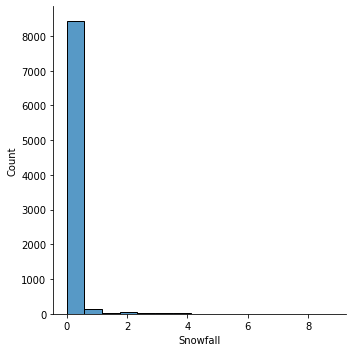

In [43]:
for col in numerical_features:
  plt.figure(figsize=(10,6))
  sns.displot(x=bike_df[col])
  plt.xlabel(col)
plt.show()

#print the plot to analyze the relationship between "Rented Bike Count"

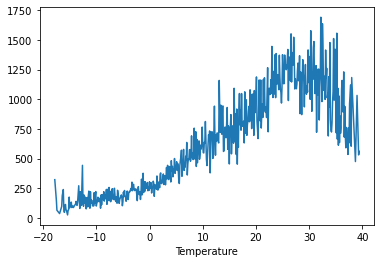

In [44]:
bike_df.groupby('Temperature').mean()['Rented_Bike_Count'].plot()

**From this plot we see that people like to ride bikes when **it is around  25°C **bold text**  

people are using less number of rented bike around-20°C 

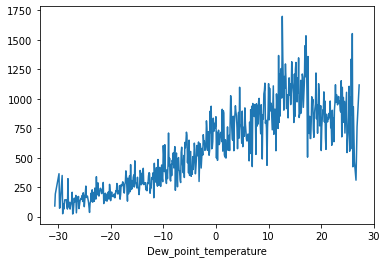

In [45]:
bike_df.groupby('Dew_point_temperature').mean()['Rented_Bike_Count'].plot()

**This plot shows the similar result of temparature graph** 
**people use bike around the temparature  25°C**

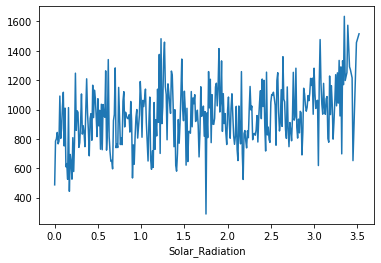

In [46]:
bike_df.groupby('Solar_Radiation').mean()['Rented_Bike_Count'].plot()

**From this graph , shows that usageof rented bike is huge , its arounnd **1000, 

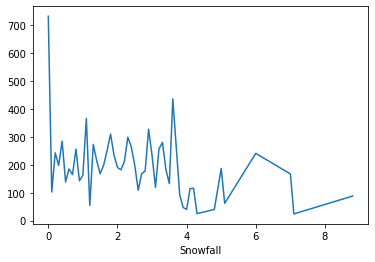

In [47]:
bike_df.groupby('Snowfall').mean()['Rented_Bike_Count'].plot()

**From this above plot it shows that when the snowfall is more than 4cm the usage of rented bike is less**

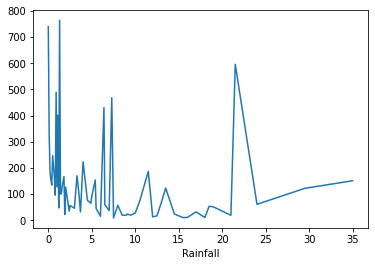

In [48]:
bike_df.groupby('Rainfall').mean()['Rented_Bike_Count'].plot()

**From the above graph we can undersatnd that  bike renting **is not affected by rainfall , beacause demand of  rent ** *bikes is not decreasing when there is 20mmof rainfall.**

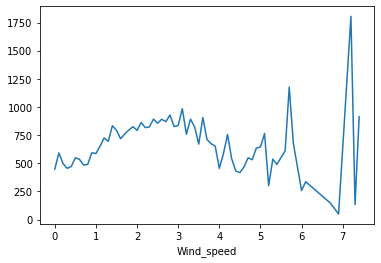

In [49]:
bike_df.groupby('Wind_speed').mean()['Rented_Bike_Count'].plot()

**Above plot shows that the demand of rented bike is uniformly distributed because when the speed of wind was 7 m/s then the demand of bike also increase.**

# **REGRESSION PLOT**

**A regressions model that describes the relationship between one response variable and one or more explanatory variables by calculating the best-fitting linear line (or plane).**


**Regression analysis is a statistical method to model the relationship between a dependent (target) and independent (predictor) variables with one or more independent variables. More specifically, Regression analysis helps us to understand how the value of the dependent variable is changing corresponding to an independent variable when other independent variables are held fixed. It predicts continuous/real values such as temperature, age, salary, price, etc.**

In [50]:
rgb_values = sns.color_palette("bright")

In [51]:
# Map continents to the colors
color_map = dict(zip(numerical_features, rgb_values))

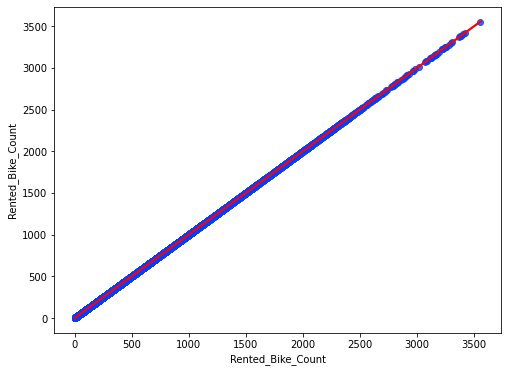

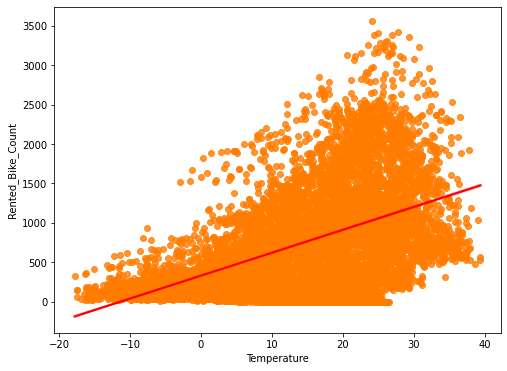

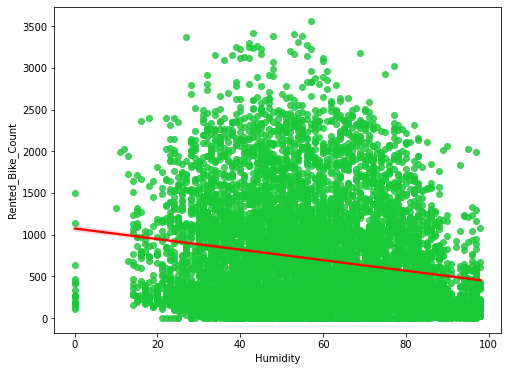

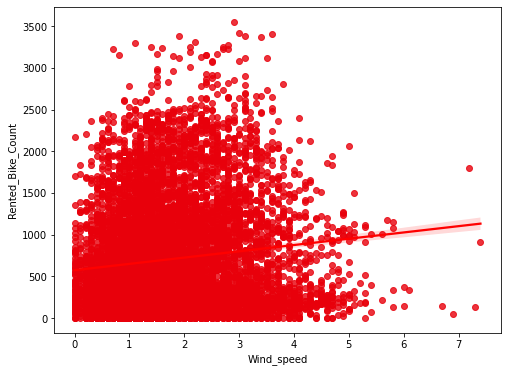

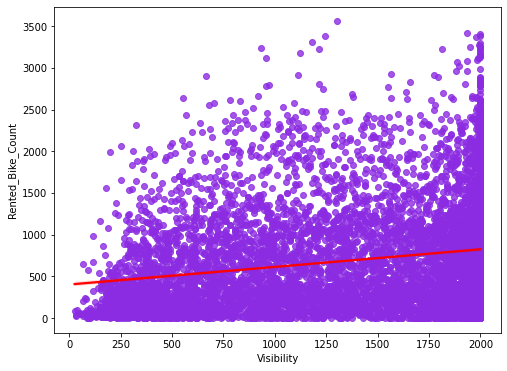

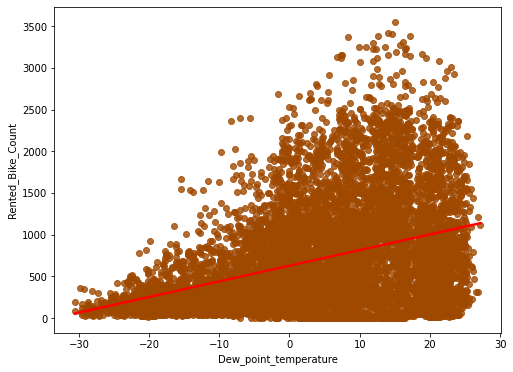

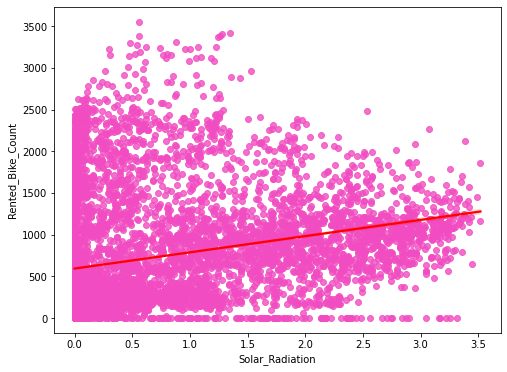

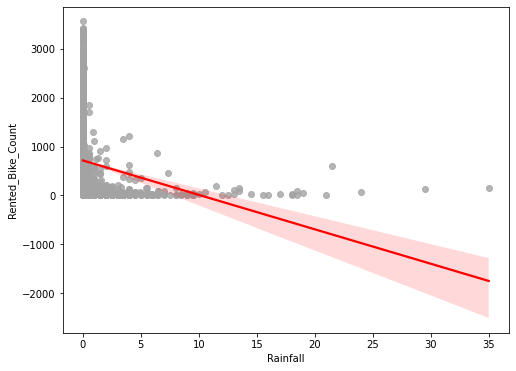

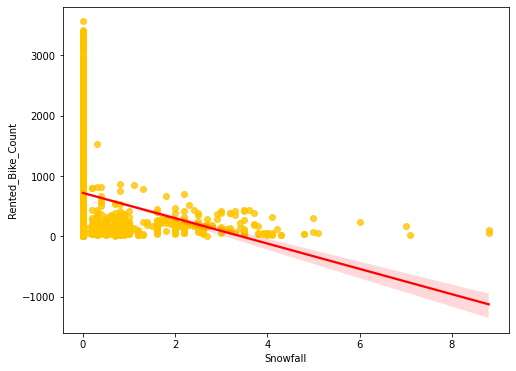

In [52]:

plt.rcParams['figure.figsize'] = (8, 6)
for col, key in zip(numerical_features, color_map):
  plt.figure()
  sns.regplot(x=bike_df[col], y = bike_df['Rented_Bike_Count'],scatter_kws={"color": color_map[key]}, line_kws={"color": "Red"})

## **OBSERVATIONS**

**Regression plot of  numerical featuressee  'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation**'**we can understand that rented bike count increses with these features** 



'**Rainfall' ,'Snowfall'  ,'Humidity' these features are negatively related with the rented bike count which means the rented bike count decreases when these features increase**.


# **PRE PROCESSING RENTED BIKE** **COUNT** 

**The data normalization (also referred to as data pre-processing) is a basic element of data mining. It means transforming the data, namely converting the source data in to another format that allows processing data effectively. The main purpose of data normalization is to minimize or even exclude duplicated data**

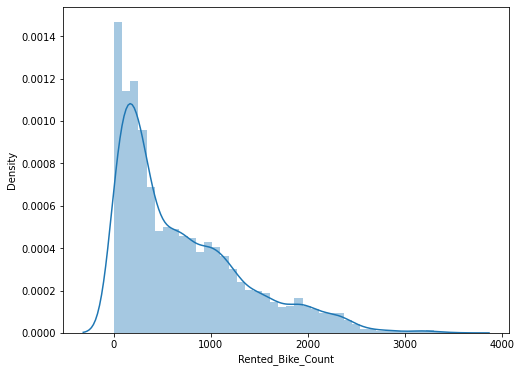

In [53]:
sns.distplot(bike_df['Rented_Bike_Count'])

**We can see it is right skewed, Let's take a square root of dependent variable and draw the plot it will give us more clarification about data and we can visualize in a better way...**

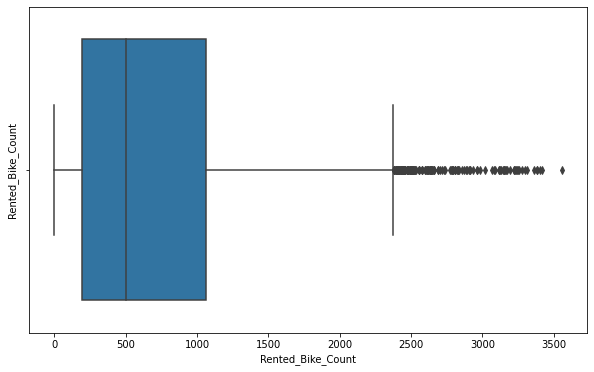

In [54]:
plt.figure(figsize=(10,6))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=bike_df['Rented_Bike_Count'])
plt.show()

**The above boxplot shows that we have detect outliers in Rented Bike Count column**

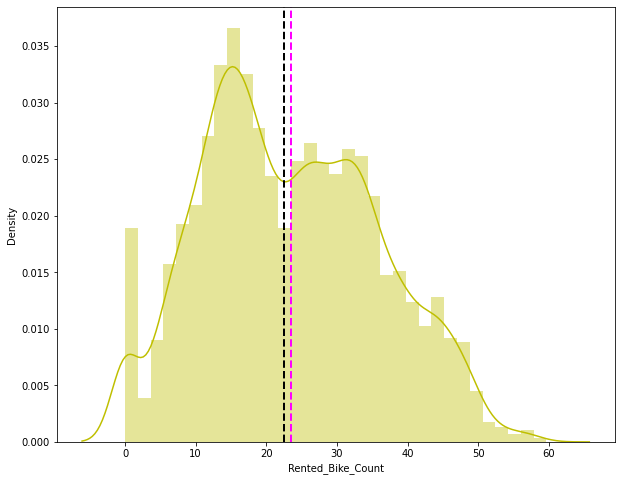

In [55]:
plt.figure(figsize=(10,8))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(bike_df['Rented_Bike_Count']), color="y")
ax.axvline(np.sqrt(bike_df['Rented_Bike_Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(bike_df['Rented_Bike_Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

**After applying Square root to the skewed Rented Bike Count, here we get almost normal distribution.**

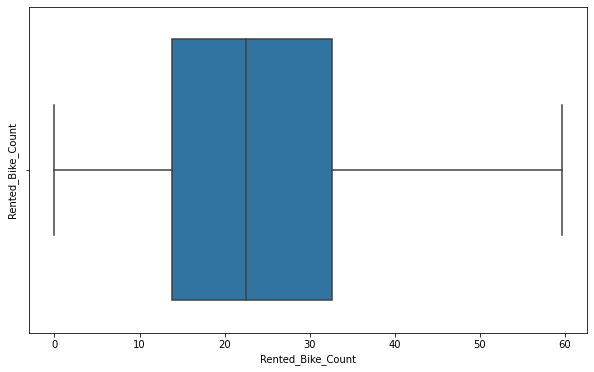

In [56]:
plt.figure(figsize=(10,6))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(bike_df['Rented_Bike_Count']))
plt.show()

**Now there is no outliners**

# **FINDING CORRELATION**

**we check correletion betweeen variables using Correlation heatmap, it is graphical representation of correlation matrix representing correlation between different variables**

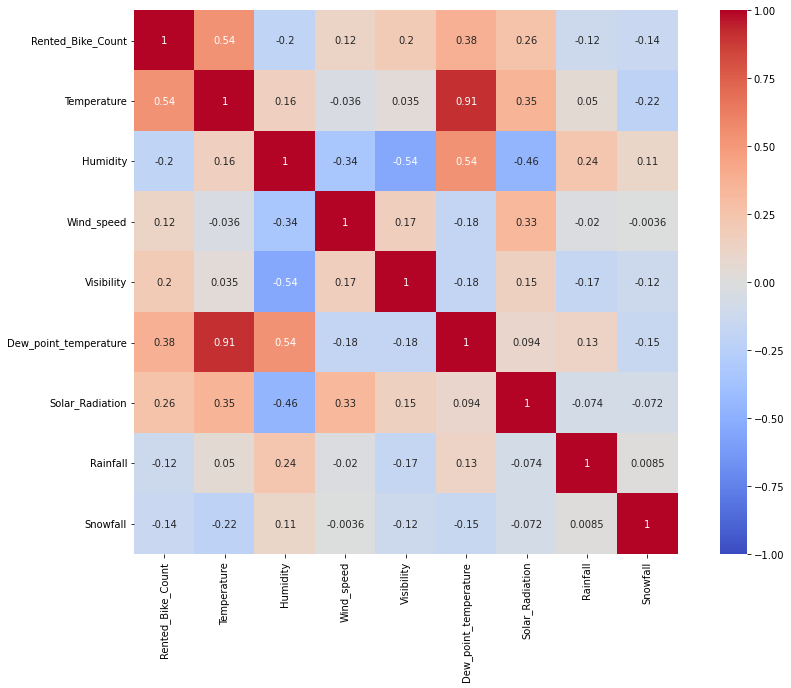

In [57]:
 #plotting graph
plt.figure(figsize=(15,10))
sns.heatmap(bike_df.corr("pearson"),
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True, 
            square=True);




**Highly correlated**

the temperature

the dew point temperature

the solar radiation

**Negatively correlated** 

Humidity
Rainfall


From the above correlation heatmap, We see that there is a positive correlation between columns 'Temperature' and 'Dew point temperature' i.e 0.91 so even if we drop this column then it does not affect the outcome of our analysis. And they have the same variations.. so we can drop the column 'Dew point temperature.

In [58]:
bike_df.head(2)

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [59]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekdays_weekend       8760 non-null   c

# LABEL ENCODING

A dataset may contain various type of values, sometimes it consists of categorical values. So, in-order to use those categorical value for programming efficiently we create dummy variables.


Also many  machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.

In [60]:
categorical_features=list(bike_df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_day', 'month',
       'weekdays_weekend'],
      dtype='object')

In [61]:
bike_data = bike_df.copy()

def one_hot_encoding(data, column):
  data = pd.concat([data, pd.get_dummies(data[column], prefix = column, drop_first = True)], axis =1)
  data = data.drop([column], axis = 1)
  return data

for col in categorical_features:
  bike_data = one_hot_encoding(bike_data, col)

In [62]:
bike_data.head(10)

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Hour_1,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,254,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
1,204,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,1,...,0,0,0,0,0,0,0,0,1,0
2,173,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
3,107,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
4,78,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
5,100,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
6,181,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
7,460,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
8,930,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
9,490,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0




---



# **MODEL BUILDING**

In [63]:
#Assign the value in X and Y
X = bike_data.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(bike_data['Rented_Bike_Count'])

In [64]:
X.head()

,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [65]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

# **Train Test split model**

**Splitting the data to Train and Test:  We will now split the data into TRAIN and TEST (80:20 ratio)We will use train_test_split method from sklearn package for this.**

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 48)
(2190, 48)


In [67]:
bike_data.describe().columns

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6',
       'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12',
       'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18',
       'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'Holiday_No Holiday',
       'Functioning_day_Yes', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'weekdays_weekend_1'],
      dtype='object')

In [68]:
X = bike_data.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(bike_data['Rented_Bike_Count'])

In [69]:
X.head()

,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0




*  The mean squared error (MSE) tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. It’s called the mean squared error as you’re finding the average of a set of errors. The lower the MSE, the better the forecast

*   MSE formula = (1/n) * Σ(actual – forecast)2 Where:

n = number of items,

Σ = summation notation,

* Actual = original or observed y-value,

* Forecast = y-value from regression.

* Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors).

* Mean Absolute Error (MAE) are metrics used to evaluate a Regression Model. ... Here, errors are the differences between the predicted values (values predicted by our regression model) and the actual values of a variable.

* R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

* Formula for R-Squared
      
​         \begin{aligned} &\text{R}^2 = 1 - \frac{ \text{Unexplained Variation} }{ \text{Total Variation} } \\ \end{aligned} 
​

* R2 =1− Total Variation Unexplained Variation​

* Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model.​




**IN THIS PROJECT WE ARE USING 7 MODEL ON OUR DATA SET FOR GETTING BEST PERFORMANCE**

LINEAR REGRESSION

LASSO REGRESSION

RIDGE REGRESSION

ELASTICNET REGRESSION

GRADIENT BOOSTING

DECISION TREE

RANDOM FORREST

XGBOOST

# LINEAR REGRESSION 

Regression models describe the relationship between variables by fitting a line to the observed data. Linear regression models use a straight line

Linear regression uses a linear approach to model the relationship between independent and dependent variables. In simple words its a best fit line drawn over the values of independent variables and dependent variable. In case of single variable, the formula is same as straight line equation having an intercept and slope.

$$ \text{y_pred} = \beta_0 + \beta_1x$$

where $$\beta_0 \text{ and } \beta_1$$ are intercept and slope respectively.

In case of multiple features the formula translates into:

$$ \text{y_pred} = \beta_0 + \beta_1x_1 + \beta_2x_2 +\beta_3x_3 +.....$$

where x_1,x_2,x_3 are the features values and 
$$\beta_0,\beta_1,\beta_2.....$$
 are weights assigned to each of the features. These become the parameters which the algorithm tries to learn using Gradient descent.

Gradient descent is the process by which the algorithm tries to update the parameters using  a loss function . Loss function is nothing but the diffence between the actual values and predicted values(aka error or residuals). There are different types of loss function but this is the simplest one. Loss function summed over all observation gives the cost functions. The role of gradient descent is to update the parameters till the cost function is minimized i.e., a global minima is reached. It uses a hyperparameter 'alpha' that gives a weightage to the cost function and decides on how big the steps to take. Alpha is called as the learning rate. It is always necesarry to keep an optimal value of alpha as high and low values of alpha might make the gradient descent overshoot or get stuck at a local minima. There are also some basic assumptions that must be fulfilled before implementing this algorithm. They are:


1. No multicollinearity in the dataset.

2. Independent variables should show linear relationship with dv.

3. Residual mean should be 0 or close to 0.

4. There should be no heteroscedasticity i.e., variance should be constant along the line of best fit.



Let us now implement our first model.
We will be using LinearRegression from scikit library.






In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [71]:
calc_vif(bike_data[[i for i in bike_df.describe().columns if i not in ['rented_bike_count']]])

,variables,VIF
0,Rented_Bike_Count,3.617343
1,Temperature,34.564747
2,Humidity,5.092372
3,Wind_speed,4.566498
4,Visibility,9.055760
5,Dew_point_temperature,16.039388
6,Solar_Radiation,2.886574
7,Rainfall,1.096052
8,Snowfall,1.119773


so there is no multicollinearity

In [72]:
#import the packages
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [73]:
#check the score
reg.score(X_train, y_train)

0.7739500178860265

In [74]:
#diffresnt coefficient for different features
reg.coef_

array([ 1.00716430e-01, -2.37171095e-01, -3.83514579e-02,  9.89292762e-04,
        4.48649754e-01,  1.10233082e+00, -1.42620210e+00,  1.97988853e-02,
       -2.02001246e+00, -4.95378959e+00, -7.24401536e+00, -9.50159767e+00,
       -9.04615325e+00, -3.99911519e+00,  2.25436221e+00,  7.48518526e+00,
        1.08263864e+00, -3.47160329e+00, -3.60398174e+00, -2.84952971e+00,
       -2.96884880e+00, -3.08067403e+00, -1.73357996e+00,  3.00563252e-01,
        4.01127439e+00,  1.03848640e+01,  6.87256706e+00,  6.09265423e+00,
        6.19988288e+00,  5.03861312e+00,  1.45957498e+00, -4.03596659e-01,
       -1.45360507e+00, -4.68852171e+00,  3.49141047e+00,  2.83549564e+01,
       -6.62050082e-01, -1.51944633e+00, -4.35688691e-01,  1.55153836e+00,
        4.42646814e+00, -1.82821742e+00, -4.05185579e+00,  4.72139757e-01,
        3.29429867e+00,  2.77928502e+00,  2.13133779e+00, -1.34812601e+00])

In [75]:
# pred train test
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [76]:
#import the packages
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#calculate MSE
MSE_lr= mean_squared_error((y_train**2), (y_pred_train**2))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train**2, y_pred_train**2)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train**2, y_pred_train**2)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 102010.33395884585
RMSE : 319.390566483805
MAE : 217.53654105328243
R2 : 0.7545194630699016
Adjusted R2 : 0.7688821060964558


Looks like our r2 score value is 0.75 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [77]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [78]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error(y_test**2, y_pred_test**2)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test**2, y_pred_test**2)
print("MAE :",MAE_lr)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test**2), (y_pred_test**2))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )

MSE : 97382.91835005354
RMSE : 312.062362918141
MAE : 211.7264345076258
R2 : 0.76652926616166
Adjusted R2 : 0.7858580231182677


The r2_score for the test set is 0.766. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter)

In [79]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
1,Linear regression,211.726,97382.918,312.062,0.767,0.79


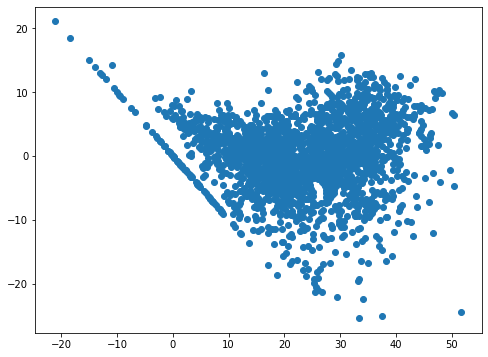

In [80]:
### Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))

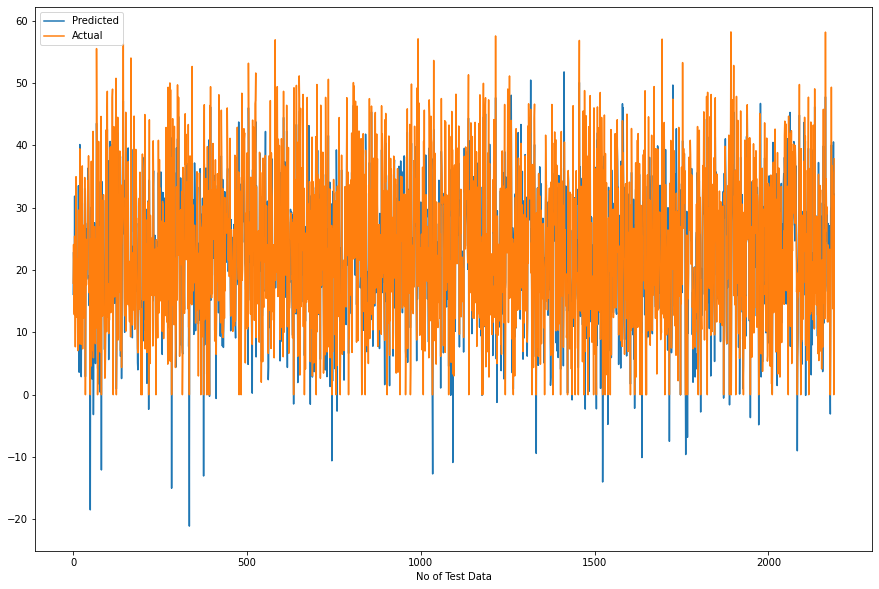

In [81]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# **LASSO REGRESSION**

In [82]:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100] }
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=7)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [83]:
#importing lasso reg model
# Using alpha = 0.01 as we got from GridSearch CV
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.001,max_iter = 3000 )

In [84]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.001, max_iter=3000)

In [85]:
# lasso score
lasso.score(X_train, y_train)

0.7739425179346591

In [86]:
#x_train and x_test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [87]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#calculate MSE
MSE_l= mean_squared_error((y_train**2), (y_pred_train_lasso**2))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train**2, y_pred_train_lasso**2)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train**2, y_pred_train_lasso**2)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_l)


MSE : 102207.57797902559
RMSE : 319.69919921549007
MAE : 217.64809336579214
R2 : 0.7540448095117679
Adjusted R2 : 0.7688744380004524


Looks like our r2 score value is 0.76




In [88]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)
training_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,217.537,102010.334,319.391,0.755,0.77
1,Lasso regression,217.648,102207.578,319.699,0.754,0.77


In [89]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error(y_test**2, y_pred_test_lasso**2)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_test**2, y_pred_test_lasso**2)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score((y_test)**2, (y_pred_test_lasso)**2)
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_l)

MSE : 97574.97512456306
RMSE : 312.36993313147644
MAE : 211.8653199068084
R2 : 0.7660688195366966
Adjusted R2 : 0.7858474258872234


The r2_score for the test set is 0.766. 

In [90]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

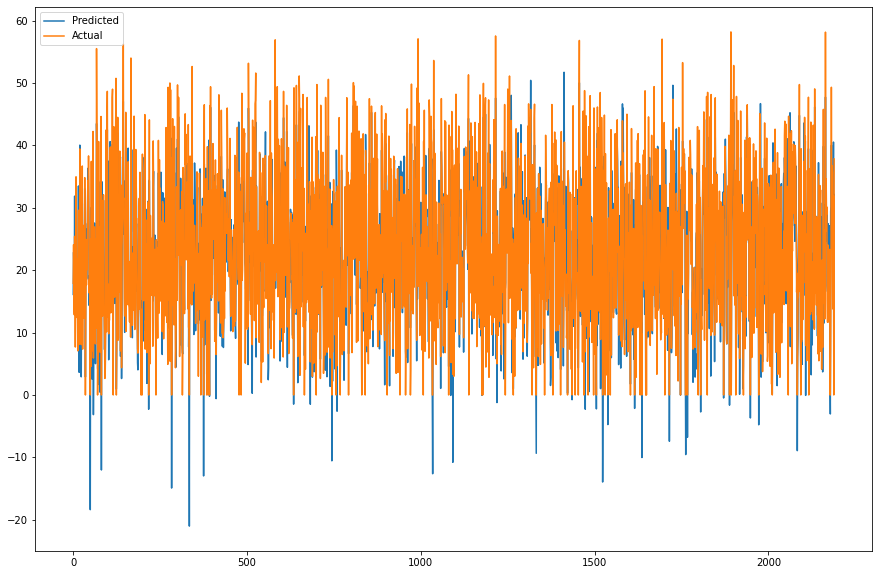

In [91]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

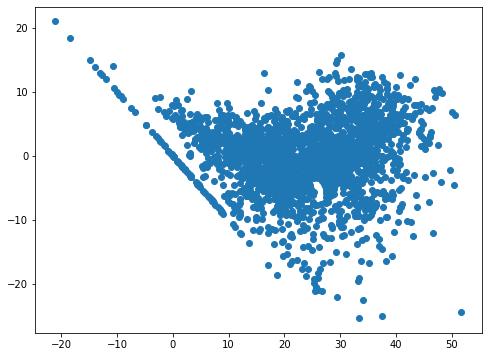

In [92]:
### Heteroscadacity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))



---



# **RIDGE REGRESSION**

In [93]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [94]:
#importing packages 
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=1)

In [95]:
ridge.fit(X_train,y_train)

Ridge(alpha=1)

In [96]:
#check the score 
ridge.score(X_train,y_train)

0.773942454762532

In [97]:
# X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [98]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_train**2), (y_pred_train_ridge**2))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train**2, y_pred_train_ridge**2)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_train**2, y_pred_train_ridge**2)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_r)

MSE : 102230.72942585938
RMSE : 319.73540533675555
MAE : 217.69635187322845
R2 : 0.7539890972189157
Adjusted R2 : 0.7688743734120422


**R2 score value is .75 that is our model is able to capture most pf the data varience . **

In [99]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [100]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error(y_test**2, y_pred_test_ridge**2)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_test**2, y_pred_test_ridge**2)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test)**2, (y_pred_test_ridge)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_r)


MSE : 97615.59516676789
RMSE : 312.43494549548694
MAE : 211.91726733363083
R2 : 0.7904553422924006
Adjusted R2 : 0.7607246479214363


**The R2 score  for the test set is 0.79. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter). **

In [101]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)


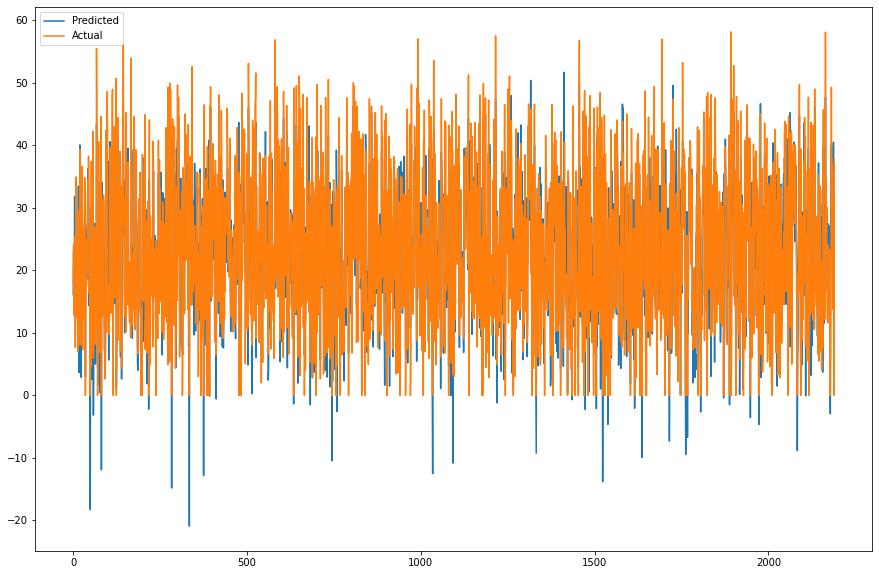

In [102]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

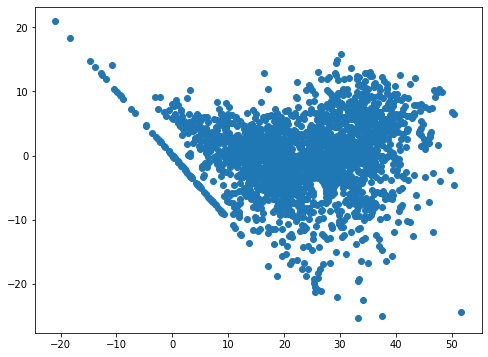

In [103]:
### Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))

# **ELASTIC NET REGRESSION**

In [104]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(l1_ratio = 0.5)
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
elastic_net_regressor = GridSearchCV(elasticnet, parameters, scoring='neg_mean_squared_error', cv=3)
elastic_net_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [105]:
#import the packages
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.00001, l1_ratio=0.5)

In [106]:
#FIT THE MODEL
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=1e-05)

In [107]:
#check the score
elasticnet.score(X_train, y_train)

0.7739500077164964

In [108]:
# X_train and X-test value
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

In [109]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error((y_train**2), (y_pred_train_en**2))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_train**2, y_pred_train_en**2)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score(y_train**2, y_pred_train_en**2)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_train**2, y_pred_train_en**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_e)


MSE : 102017.94960654936
RMSE : 319.40248841633866
MAE : 217.5421171903834
R2 : 0.754501136561059
Adjusted R2 : 0.7489971919346838


**Looks like our r2 score value is 0.75 that means our model is able to capture most of the data variance.**

In [110]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [111]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error(y_test**2, y_pred_test_en**2)
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_test**2, y_pred_test_en**2)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score((y_test**2), (y_pred_test_en**2))
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score((y_test**2), (y_pred_test_en**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_e)


MSE : 97391.1135066443
RMSE : 312.07549328110383
MAE : 211.73353838387655
R2 : 0.7665096186787586
Adjusted R2 : 0.7612748973787027


**The r2_score for the test set is 0.76. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter)**

In [112]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Elastic net regression Test',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),3)}
test_df = test_df.append(dict2, ignore_index = True)
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,211.726,97382.918,312.062,0.767,0.790
1,Lasso regression,211.865,97574.975,312.370,0.766,0.790
2,Ridge regression,211.917,97615.595,312.435,0.790,0.760
3,Elastic net regression Test,211.734,97391.114,312.075,0.767,0.761


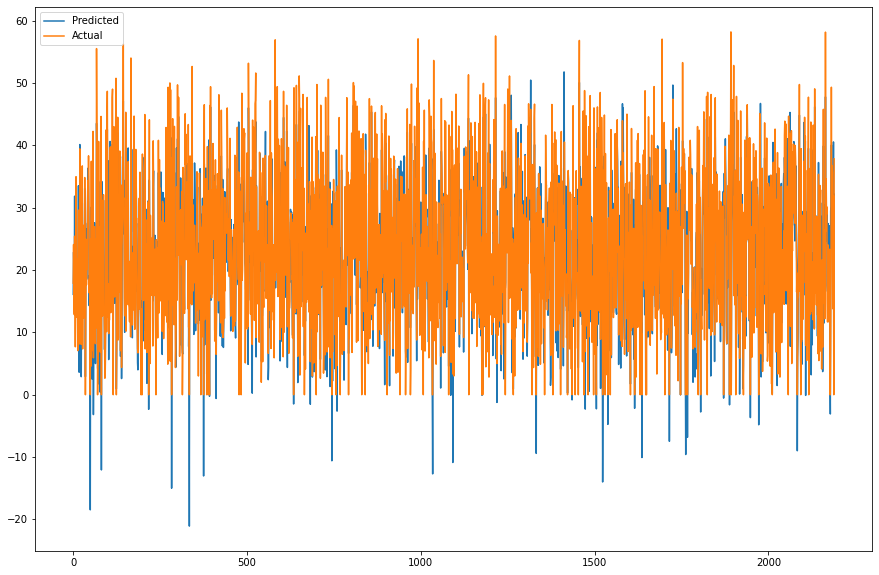

In [113]:
#plot thefigure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

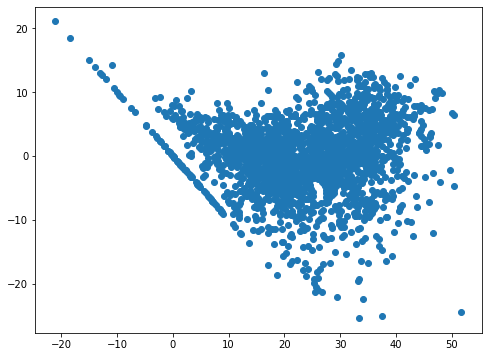

In [114]:
### Heteroscadacity
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en))

# **DECISION TREE**

In [115]:
#import the packages
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=10,
                      max_features=10, max_leaf_nodes=100,random_state=0)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=10,
                      max_leaf_nodes=100, random_state=0)

In [116]:
#get the X_train and X-test value
y_pred_train_d = decision_regressor.predict(X_train)
y_pred_test_d = decision_regressor.predict(X_test)

In [117]:
#evaluating the metrics of decision tree on train data
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,y_train))

#calculate MSE
MSE_d= mean_squared_error(y_train**2, y_pred_train_d**2)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_train**2, y_pred_train_d**2)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score((y_train)**2, (y_pred_train_d)**2)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test**2), (y_pred_test_d**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_d )

Model Score: 0.7505865897206834
MSE : 129081.66123099346
RMSE : 359.2793637700243
MAE : 240.805856572569
R2 : 0.6893742596745456
Adjusted R2 : 0.6432426702550184


Looks like our r2 score value is 0.689 that means our model is able to capture most of the data varianc

In [118]:
dict1={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
training_df=training_df.append(dict1,ignore_index=True)
training_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,217.537,102010.334,319.391,0.755,0.77
1,Lasso regression,217.648,102207.578,319.699,0.754,0.77
2,Ridge regression,217.696,102230.729,319.735,0.754,0.77
3,Elastic net regression,217.542,102017.950,319.402,0.755,0.75
4,Dicision tree regression,240.806,129081.661,359.279,0.689,0.64


In [119]:
# evaluating metrics for test set
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_d= mean_squared_error(y_test**2, y_pred_test_d**2)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_test**2, y_pred_test_d**2)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score((y_test)**2, (y_pred_test_d)**2)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test**2), (y_pred_test_d**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_d )

MSE : 145543.94663153094
RMSE : 381.5022236259324
MAE : 253.5170950302398
R2 : 0.6510655810945611
Adjusted R2 : 0.6432426702550184


In [120]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Decision tree test ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df = test_df.append(dict2, ignore_index = True)


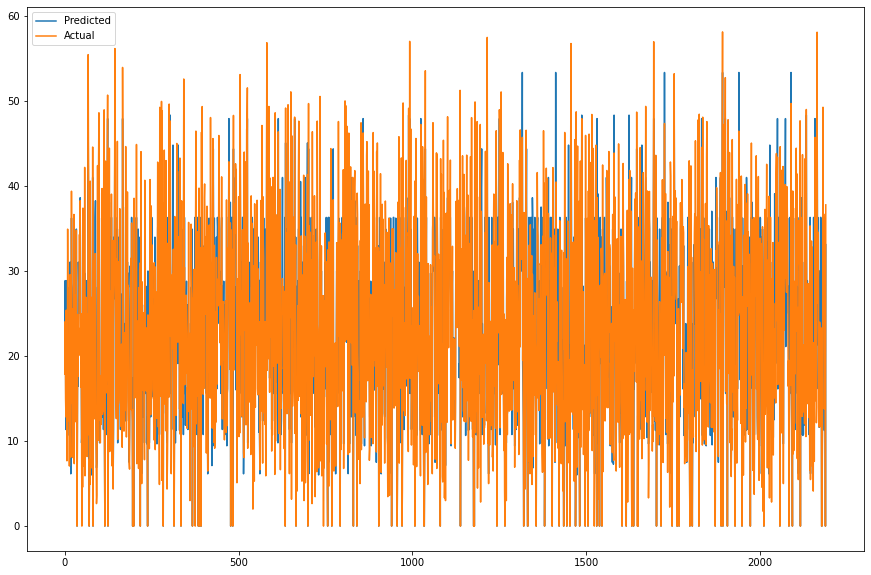

In [121]:
# plotting the actual and predicted values
plt.figure(figsize=(15,10))
plt.plot((np.array(y_pred_test_d)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

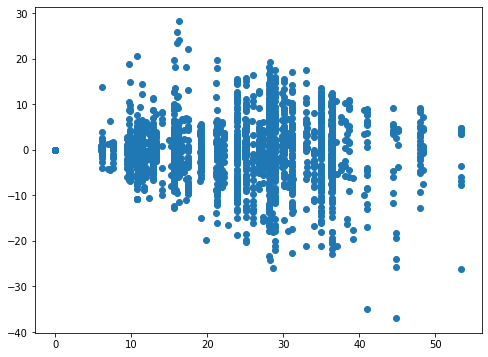

In [122]:
# Heteroscedasticity check
plt.scatter((y_pred_test_d), (y_test)-(y_pred_test_d))

# **RANDOM FOREST**

In [123]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()
# Fitting the model
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [124]:
# Making predictions on train and test data

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)

In [125]:
# evaluating metrics for train data
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

#calculate MSE
MSE_rf= mean_squared_error(y_train**2, y_pred_train_r**2)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train**2, y_pred_train_r**2)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_train)**2, (y_pred_train_r)**2)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train**2, y_pred_train_r**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print('Adjusted_R2 :', Adjusted_R2_rf)

Model Score: 0.9896385358253056
MSE : 4570.37315993774
RMSE : 67.60453505451937
MAE : 40.38585701100896
R2 : 0.9890017254749401
Adjusted_R2 : 0.9887551504272041


In [126]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df = training_df.append(dict1, ignore_index = True)
training_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,217.537,102010.334,319.391,0.755,0.77
1,Lasso regression,217.648,102207.578,319.699,0.754,0.77
2,Ridge regression,217.696,102230.729,319.735,0.754,0.77
3,Elastic net regression,217.542,102017.950,319.402,0.755,0.75
4,Dicision tree regression,240.806,129081.661,359.279,0.689,0.64
5,Random forest regression,40.386,4570.373,67.605,0.989,0.99


In [127]:
# evaluating the metrics for test data
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_rf= mean_squared_error(y_test**2, y_pred_test_r**2)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test**2, y_pred_test_r**2)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test**2), (y_pred_test_r**2))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test**2), (y_pred_test_r**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_rf )

MSE : 38236.19923171006
RMSE : 195.54078661933949
MAE : 111.71933563890892
R2 : 0.9083306020699942
Adjusted R2 : 0.9062754264041183


The r2_score for the test set is 0.906. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [128]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)

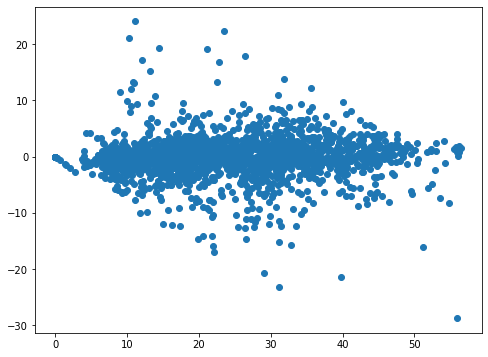

In [129]:
### Heteroscadacity
plt.scatter((y_pred_test_r),(y_test)-(y_pred_test_r))

In [130]:
rf_model.feature_importances_

array([3.02522258e-01, 1.53322741e-01, 1.13571377e-02, 1.10226416e-02,
       1.80700320e-02, 3.12269617e-02, 3.27895527e-02, 1.48572008e-03,
       4.11741576e-03, 1.27090402e-02, 2.07138917e-02, 2.90800014e-02,
       2.52367478e-02, 7.36776111e-03, 4.03844938e-03, 1.48545501e-02,
       9.01171304e-04, 1.97090924e-03, 8.89426567e-04, 2.35523079e-04,
       2.38495745e-04, 3.75499028e-04, 1.46647028e-03, 3.62583904e-03,
       1.03470494e-02, 3.10424230e-02, 1.80121900e-02, 1.27739667e-02,
       1.33727043e-02, 1.06121556e-02, 4.31467920e-03, 4.01473688e-03,
       8.96886985e-04, 1.06463756e-02, 3.72083660e-03, 1.52418283e-01,
       2.70263577e-04, 3.79241681e-03, 1.16072259e-03, 1.32801964e-03,
       2.22102761e-03, 5.37263281e-04, 1.26611964e-03, 6.77071928e-04,
       2.60613557e-03, 4.48910050e-03, 7.63571510e-04, 1.90977628e-02])

In [131]:
X_train.head()

,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
8639,3.8,83,1.1,390,1.1,0.00,0.0,0.4,0,0,...,0,0,0,0,0,0,0,1,0,1
3614,24.0,47,2.3,520,11.9,2.87,0.0,0.0,0,0,...,1,0,0,0,0,0,0,0,0,0
1387,-7.1,33,2.0,1887,-20.6,0.00,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
3900,12.3,97,0.8,238,11.8,0.14,2.0,0.0,0,0,...,0,1,0,0,0,0,0,0,0,1
8044,3.6,70,0.8,1934,-1.3,0.00,0.0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [132]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [133]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)


In [134]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature,0.30
35,Functioning_day_Yes,0.15
1,Humidity,0.15
25,Hour_18,0.03
5,Solar_Radiation,0.03
6,Rainfall,0.03
12,Hour_5,0.03
11,Hour_4,0.03
10,Hour_3,0.02
26,Hour_19,0.02


In [135]:
#FIT THE MODEL
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [136]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

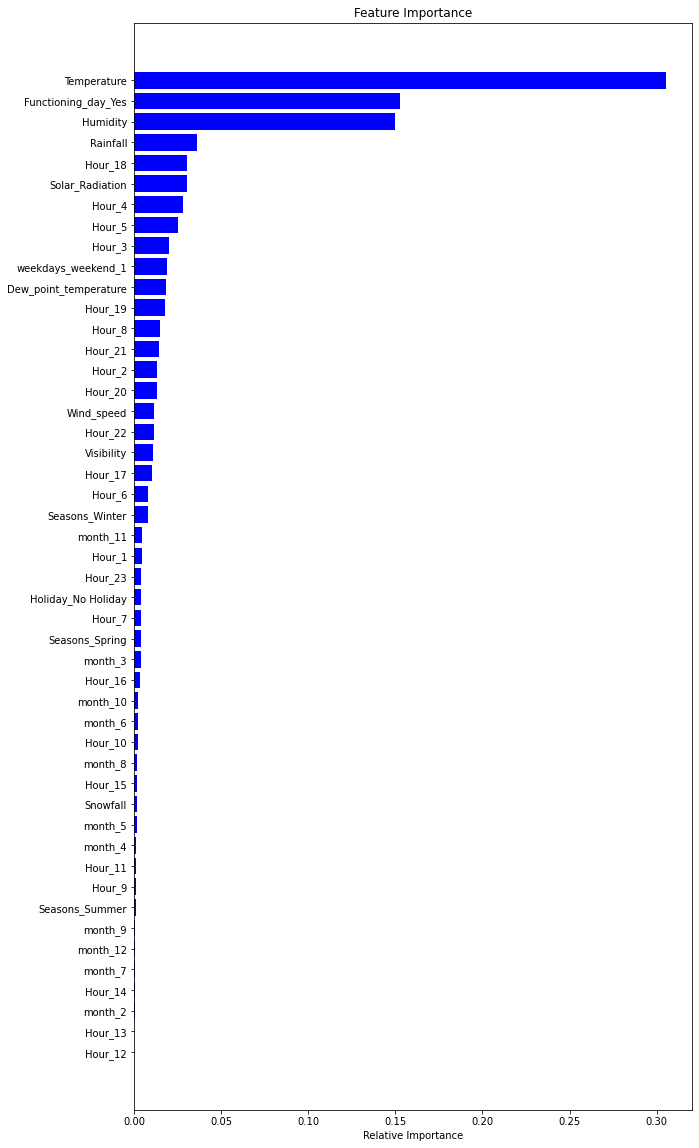

In [137]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **GRADIENT BOOSTING**

In [138]:
#import the packages
from sklearn.ensemble import GradientBoostingRegressor
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()


gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [139]:
y_pred_train_g = gb_model.predict(X_train)
y_pred_test_g = gb_model.predict(X_test)

In [140]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_model.score(X_train,y_train))
#calculate MSE
MSE_gb= mean_squared_error(y_train**2, y_pred_train_g**2)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_train**2, y_pred_train_g**2)
print("MAE :",MAE_gb)

#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score(y_train**2, y_pred_train_g**2)
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score(y_train**2, y_pred_train_g**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_gb)

Model Score: 0.8792545917263987
MSE : 64388.43393115223
RMSE : 253.7487614376713
MAE : 168.44861289865278
R2 : 0.8450538615050109
Adjusted R2 : 0.841580057372475


Looks like our r2 score value is 0.84 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons

In [141]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
training_df=test_df.append(dict1,ignore_index=True)

In [142]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_gb= mean_squared_error(y_test**2, y_pred_test_g**2)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_test**2, y_pred_test_g**2)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score((y_test)**2, (y_pred_test_g)**2)
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score((y_test)**2, (y_pred_test_g)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_gb)

MSE : 68625.7745913681
RMSE : 261.9652163768467
MAE : 175.00856593023454
R2 : 0.8354730970735751
Adjusted R2 : 0.8317844976618664


The r2_score for the test set is 0.83. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity

In [143]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

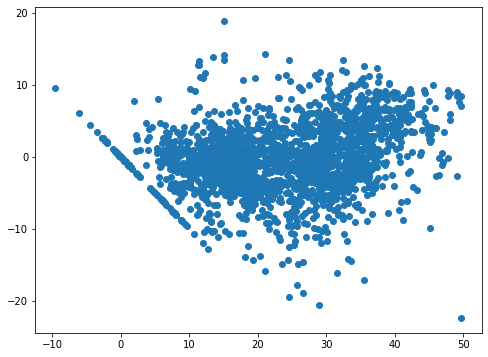

In [144]:
### Heteroscadacity
plt.scatter((y_pred_test_g),(y_test)-(y_pred_test_g))

In [145]:
gb_model.feature_importances_

array([3.15675871e-01, 1.26230762e-01, 3.58908249e-04, 5.87975710e-04,
       8.58796274e-03, 4.80909638e-02, 6.50566755e-02, 2.12847990e-04,
       4.09901407e-04, 6.06602095e-03, 1.48251635e-02, 2.75967859e-02,
       2.07865013e-02, 5.61488942e-03, 0.00000000e+00, 1.04039477e-02,
       0.00000000e+00, 2.80796024e-03, 1.37948516e-03, 0.00000000e+00,
       0.00000000e+00, 4.51652026e-05, 0.00000000e+00, 3.61654579e-04,
       7.29825592e-03, 3.02335512e-02, 1.78281454e-02, 1.12242613e-02,
       1.56825848e-02, 1.19639035e-02, 3.33070922e-04, 5.20595611e-05,
       0.00000000e+00, 3.62799014e-02, 1.91895608e-03, 1.75534689e-01,
       0.00000000e+00, 1.77094565e-03, 1.33684008e-04, 2.04838602e-04,
       2.89016742e-03, 0.00000000e+00, 2.19365873e-03, 0.00000000e+00,
       6.54285183e-03, 4.49082445e-03, 5.53067183e-04, 1.77711403e-02])

In [146]:
importances = gb_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [147]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
importance_df.head()

,Feature,Feature Importance
0,Temperature,0.32
1,Humidity,0.13
2,Wind_speed,0.00
3,Visibility,0.00
4,Dew_point_temperature,0.01


In [148]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature,0.32
35,Functioning_day_Yes,0.18
1,Humidity,0.13
6,Rainfall,0.07
5,Solar_Radiation,0.05
33,Seasons_Winter,0.04
11,Hour_4,0.03
25,Hour_18,0.03
28,Hour_21,0.02
26,Hour_19,0.02


In [149]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [150]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

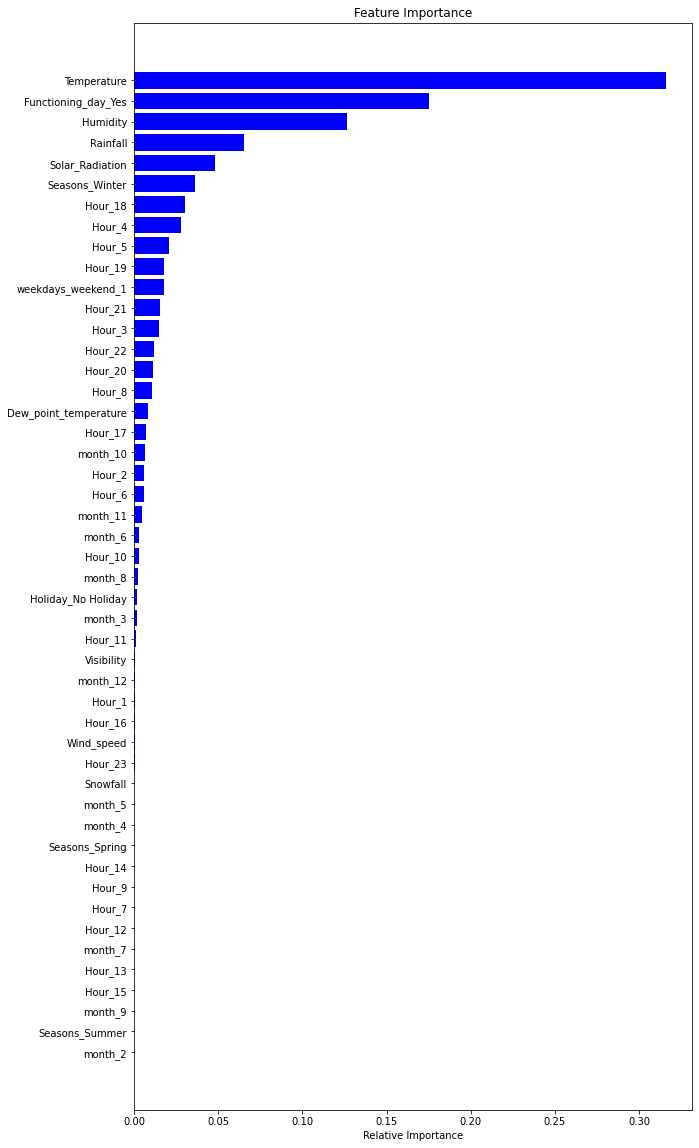

In [151]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# HYPERPARAMETER TUNING

Hyperparameter tuning is the process of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a model argument whose value is set before the learning process begins. The key to machine learning algorithms is hyperparameter tuning.

Using GridSearchCV

GridSearchCV helps to loop through predefined hyperparameters and fit the model on the training set. So, in the end, we can select the best parameters from the listed hyperparameters.

In [152]:
#number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [153]:
param_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

In [ ]:
#importing gradient boosting regression
from sklearn.model_selection import GridSearchCV
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

gb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.2s
[CV] END max_depth=4, min_sam

In [ ]:
gb_grid.best_estimator_

In [ ]:
gb_optimal_model = gb_grid.best_estimator_

In [ ]:
gb_grid.best_params_

In [ ]:
 #Making predictions on train and test data

y_pred_train_g_g = gb_optimal_model.predict(X_train)
y_pred_g_g= gb_optimal_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_optimal_model.score(X_train,y_train))
MSE_gbh= mean_squared_error(y_train**2, y_pred_train_g_g**2)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_train**2, y_pred_train_g_g**2)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score(y_train**2, y_pred_train_g_g**2)
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_train**2, y_pred_train_g_g**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_gbh)

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
from sklearn.metrics import mean_squared_error
MSE_gbh= mean_squared_error(y_test**2, y_pred_g_g**2)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_test**2, y_pred_g_g**2)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score((y_test), (y_pred_g_g))
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_test**2, y_pred_g_g**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_gbh)


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_g_g),(y_test)-(y_pred_g_g))

In [ ]:
gb_optimal_model.feature_importances_

In [ ]:
importances = gb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)


In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
importance_df.head()

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

In [ ]:
gb_model.fit(X_train,y_train)

In [ ]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

In [ ]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

# **CONCLUSIONS**

* We train the dataset to predict the number of rented bike is used in the given weather conditions .
* initially we did EDA on all the features of our dataset ,analyse depedndent variable and categorical variables.  


* Implemented 7 mechine learning algorithms Regression,lasso,ridge,elasticnet,decission tree, Random Forest and XGBoost.  All algorithms performed really well on both training dataset and testing dataset so we can say that variance is less and no issues of overfittings are present.

*    "Random forest regression(90%)" and "Gradient Boosting regression(gridsearch cv) has highest R2 score(84%).

*  DECISION TREE algoritham has c0mparatively less R2 score(65%)

*however ,this results are not the ultimate . as this data is time dependent , the values  for variables like temperature, solar_radiation, wind_speed etc., will not always be consistent.Therefore, there will be scenarios where the model might not perform well. As Machine learning is an exponentially evolving field, we will have to be prepared for all contingencies and also keep checking our model from time to time. Therefore, having a quality knowledge and keeping pace with the ever evolving ML field would surely help one to stay a step ahead in future.
 



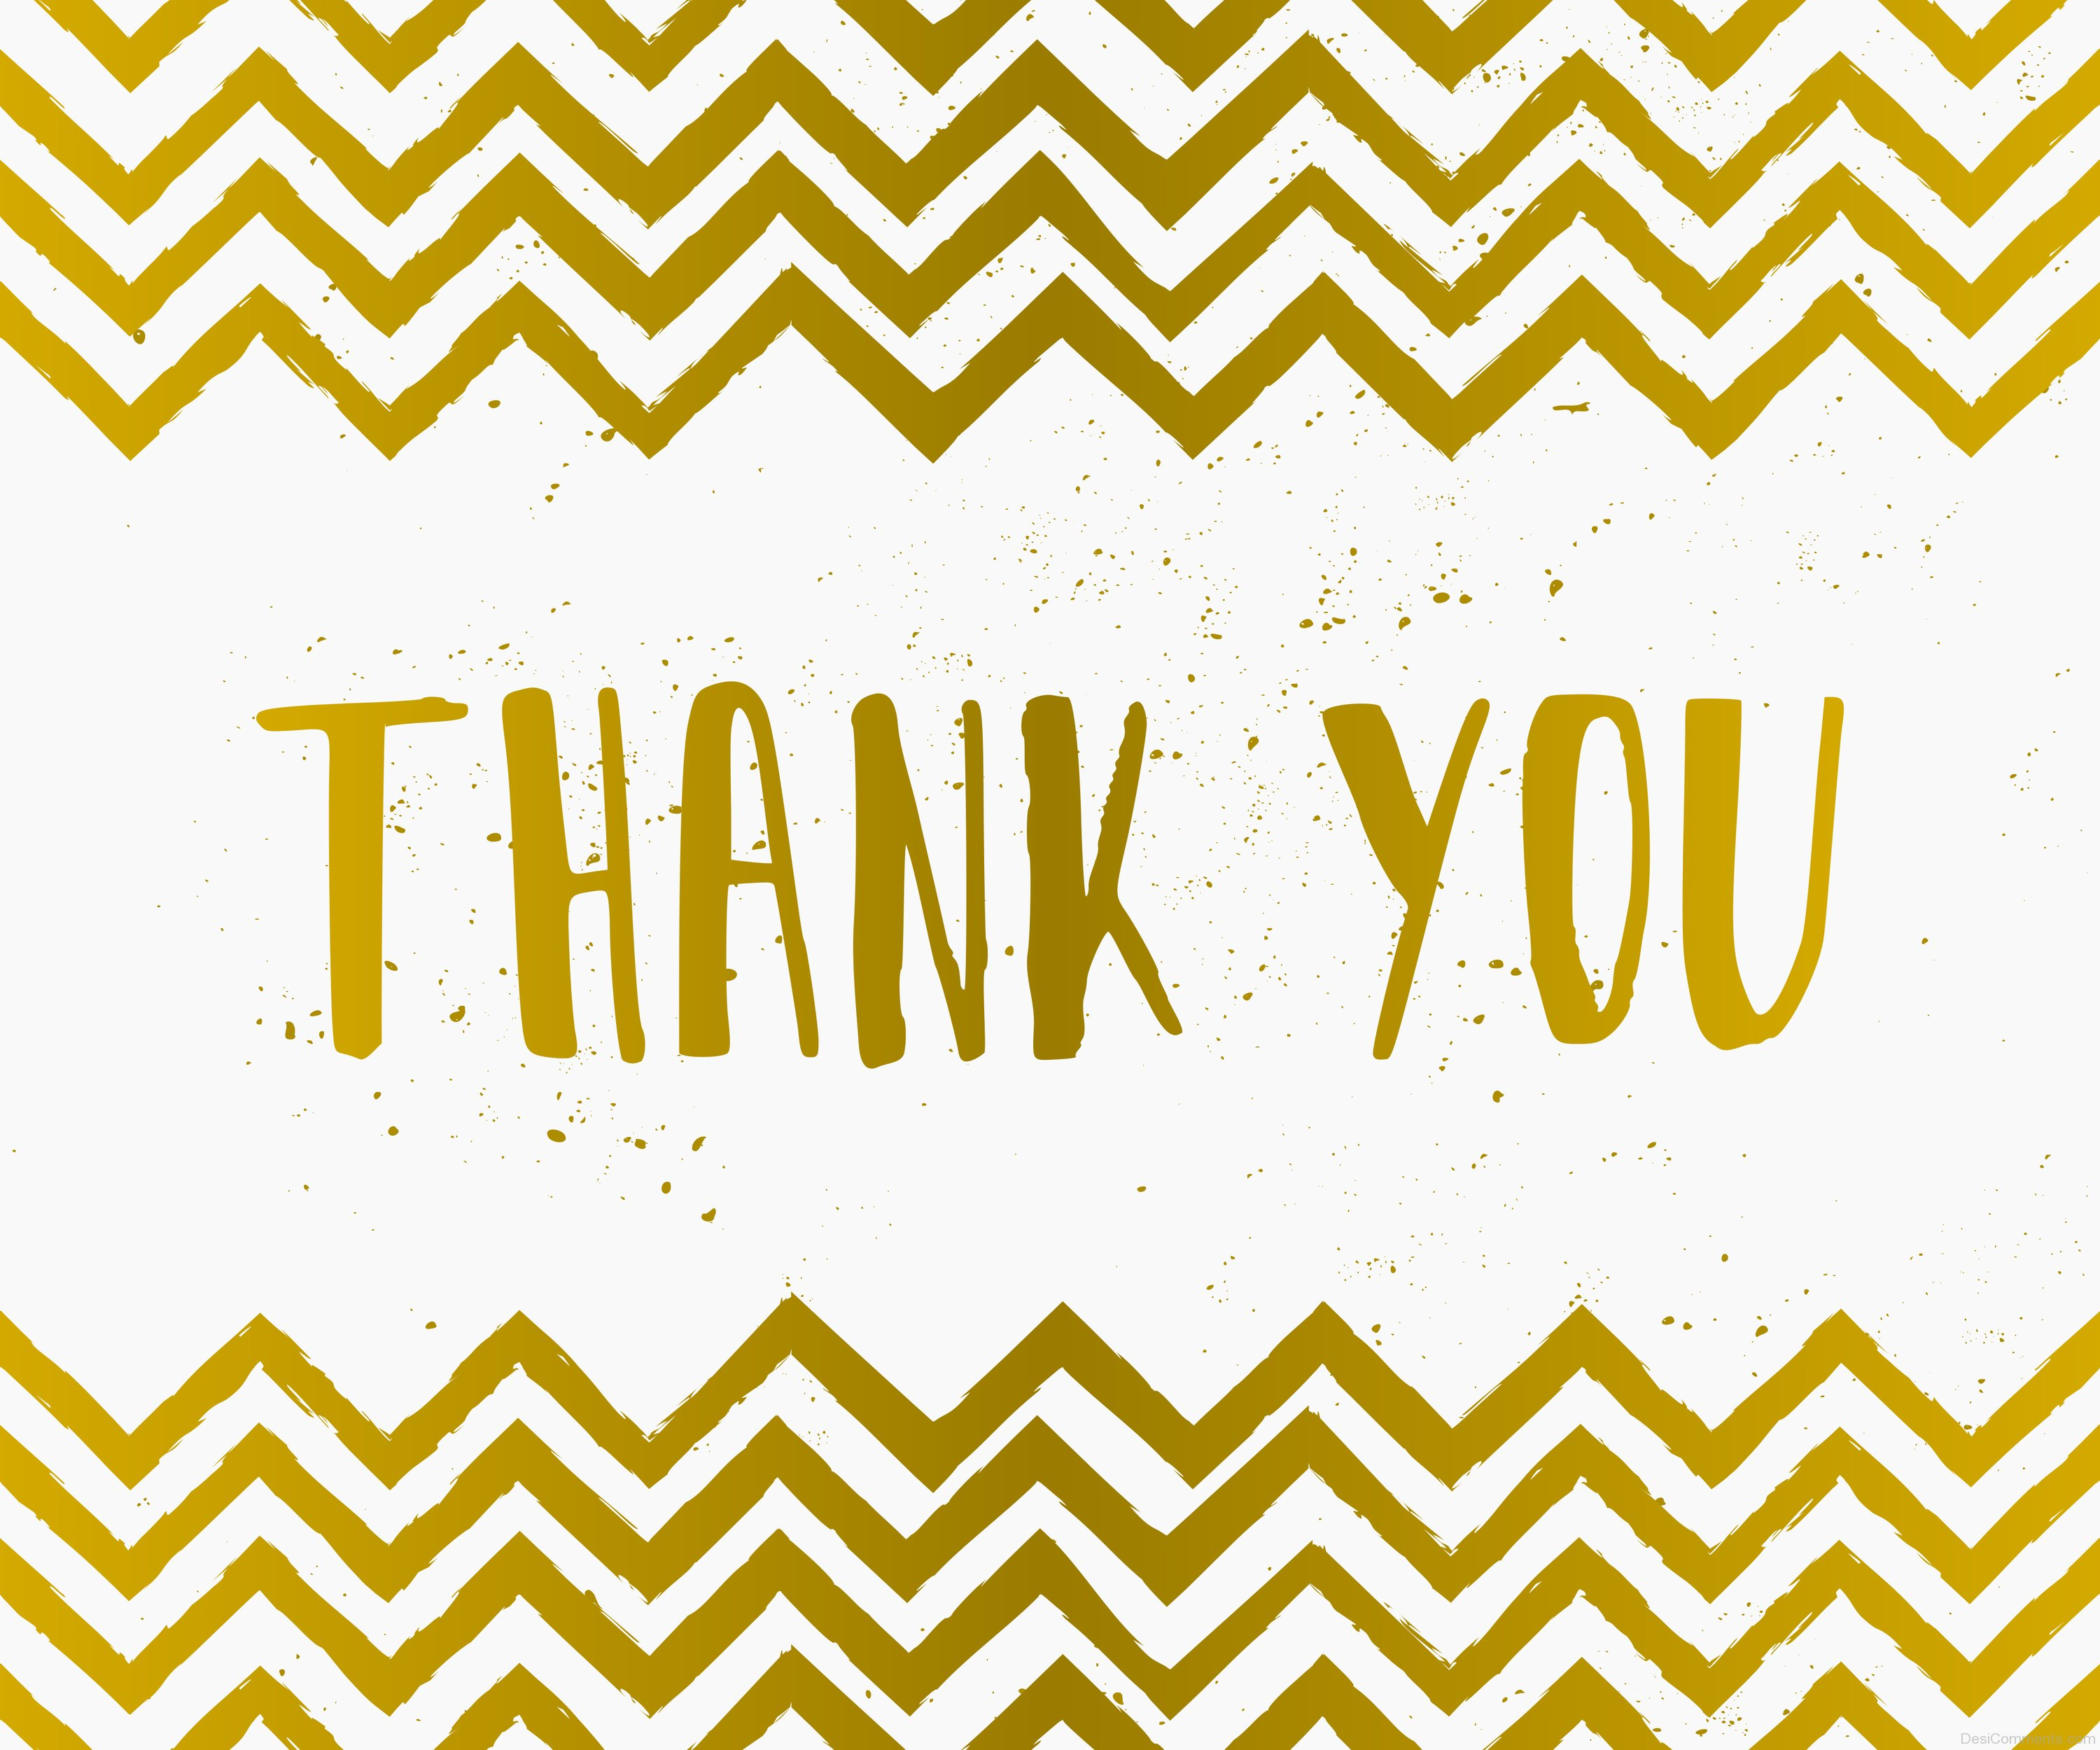